# Tanzania water pump

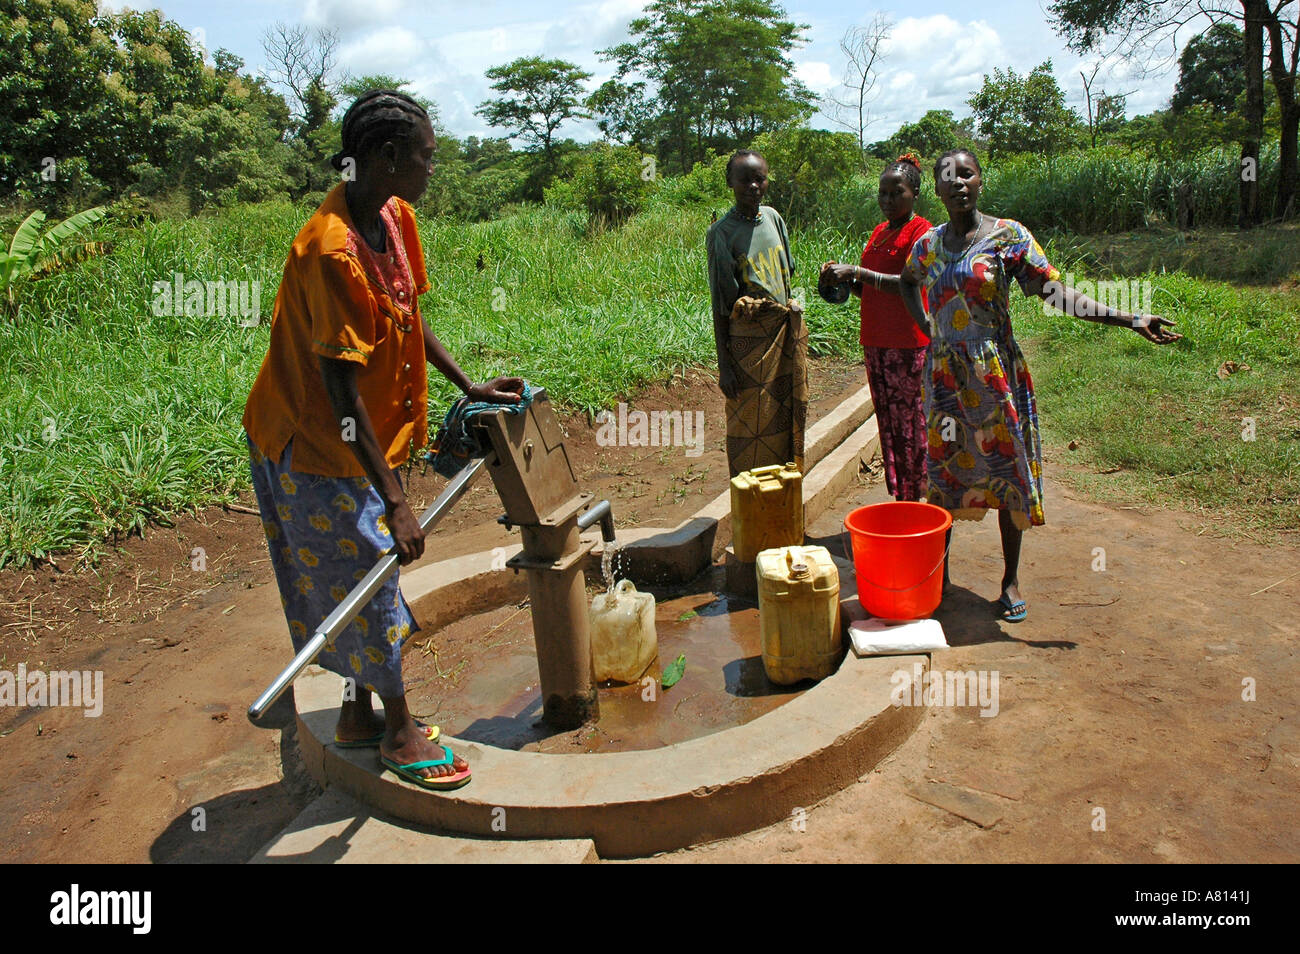

## Introduction

## Business Problem

### Data understanding

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
tanzania_water_test_set = pd.read_csv("/home/sarah/Phase3/Phase3 Project/test-set-values.csv")
tanzania_water_train_labels = pd.read_csv("/home/sarah/Phase3/Phase3 Project/training-set-labels.csv")
tanzania_water_train_set = pd.read_csv("/home/sarah/Phase3/Phase3 Project/training-set-values.csv")

In [3]:
#view first 5 columns of test set
tanzania_water_test_set.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2/4/2013,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2/4/2013,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2/1/2013,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,1/22/2013,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,3/27/2013,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [4]:
#Check for the 5 values of labels
tanzania_water_train_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [5]:
tanzania_water_train_set

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,4/11/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


#### Data preparation

In [6]:
#Check for missing values
tanzania_water_test_set.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [7]:
#Check for unique values in categorical variables
cat_vars = tanzania_water_test_set.select_dtypes(include='object').columns
object_nunique = list(map(lambda col: tanzania_water_test_set[col].nunique(), cat_vars))
d = dict(zip(cat_vars, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('recorded_by', 1),
 ('public_meeting', 2),
 ('permit', 2),
 ('source_class', 3),
 ('management_group', 5),
 ('quantity', 5),
 ('quantity_group', 5),
 ('quality_group', 6),
 ('waterpoint_type_group', 6),
 ('extraction_type_class', 7),
 ('payment', 7),
 ('payment_type', 7),
 ('source_type', 7),
 ('waterpoint_type', 7),
 ('water_quality', 8),
 ('basin', 9),
 ('source', 10),
 ('scheme_management', 11),
 ('management', 12),
 ('extraction_type_group', 13),
 ('extraction_type', 17),
 ('region', 21),
 ('lga', 125),
 ('date_recorded', 331),
 ('funder', 980),
 ('installer', 1091),
 ('scheme_name', 1789),
 ('ward', 1959),
 ('subvillage', 8443),
 ('wpt_name', 10840)]

In [8]:
#Replace scheme management, public meeting, permit and funder with "Unknown"
tanzania_water_test_set["scheme_management"].fillna("unknown", inplace = True)
tanzania_water_test_set["public_meeting"].fillna("unknown", inplace = True)
tanzania_water_test_set["permit"].fillna("unknown", inplace = True)
tanzania_water_test_set["funder"].fillna("unknown", inplace = True)
tanzania_water_test_set["installer"].fillna("unknown", inplace = True)
tanzania_water_test_set["subvillage"].fillna("unknown", inplace = True)
tanzania_water_test_set["scheme_name"].fillna("unknown", inplace = True)

In [9]:
tanzania_water_test_set.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

#### Tanzania water train label

In [10]:
#Checking for missing values
tanzania_water_train_labels.isna().sum()

id              0
status_group    0
dtype: int64

#### Tanzania water train

In [11]:
#Checking for missing values in train set csv
tanzania_water_train_set.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [12]:
#Check for unique values in categorical variables
cat_vars = tanzania_water_train_set.select_dtypes(include='object').columns
object_nunique = list(map(lambda col:tanzania_water_train_set[col].nunique(), cat_vars))
d = dict(zip(cat_vars, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('recorded_by', 1),
 ('public_meeting', 2),
 ('permit', 2),
 ('source_class', 3),
 ('management_group', 5),
 ('quantity', 5),
 ('quantity_group', 5),
 ('quality_group', 6),
 ('waterpoint_type_group', 6),
 ('extraction_type_class', 7),
 ('payment', 7),
 ('payment_type', 7),
 ('source_type', 7),
 ('waterpoint_type', 7),
 ('water_quality', 8),
 ('basin', 9),
 ('source', 10),
 ('scheme_management', 12),
 ('management', 12),
 ('extraction_type_group', 13),
 ('extraction_type', 18),
 ('region', 21),
 ('lga', 125),
 ('date_recorded', 356),
 ('funder', 1897),
 ('ward', 2092),
 ('installer', 2145),
 ('scheme_name', 2696),
 ('subvillage', 19287),
 ('wpt_name', 37400)]

In [13]:
#Replace scheme management, public meeting, permit and funder with "Unknown"
tanzania_water_train_set["scheme_management"].fillna("unknown", inplace = True)
tanzania_water_train_set["public_meeting"].fillna("unknown", inplace = True)
tanzania_water_train_set["permit"].fillna("unknown", inplace = True)
tanzania_water_train_set["funder"].fillna("unknown", inplace = True)
tanzania_water_train_set["installer"].fillna("unknown", inplace = True)
tanzania_water_train_set["subvillage"].fillna("unknown", inplace = True)
tanzania_water_train_set["scheme_name"].fillna("unknown", inplace = True)

In [14]:
#Checking for missing values
tanzania_water_train_set.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [15]:
# Add binary variables for train set and test values
tanzania_water_train_set["train"] = True
tanzania_water_test_set["test"] = True

# Merge train values and test values
data = pd.concat([tanzania_water_train_set, tanzania_water_test_set], ignore_index = True)

# Merge train labels
data = pd.merge(data, tanzania_water_train_labels, on="id", how="outer")
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,train,test,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,True,NaN,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,NaN,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,True,NaN,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,True,NaN,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,NaN,functional


In [16]:
data.shape

(74250, 43)

In [17]:
def explore(data):
    df = pd.DataFrame()
    for col in list(data):
        unique_values = data[col].unique()
        try:
            unique_values = np.sort(unique_values)
        except:
            pass
        nans = round(pd.isnull(data[col]).sum()/data.shape[0]*100, 1)
        zeros = round((data[col] == 0).sum()/data.shape[0]*100, 1)
        dtypes = ", ".join(data[col].map(lambda val: val.__class__.__name__).unique())
        df = df.append(pd.DataFrame([col,
                                     dtypes,
                                     len(unique_values),
                                     nans,
                                     zeros,
                                     unique_values[:5],
                                     unique_values[-5:]]).T,
                       ignore_index = True)
    return df.rename(columns = {0: "variable",
                                1: "dtypes",
                                2: "unique_values",
                                3: "Nan %",
                                4: "zeros %",
                                5: "first_5",
                                6: "last_5"})

explore(data)

,variable,dtypes,unique_values,Nan %,zeros %,first_5,last_5
0,id,int,74250,0,0,"[0, 1, 2, 3, 4]","[74245, 74246, 74247, 74248, 74249]"
1,amount_tsh,float,102,0,70.1,"[0.0, 0.2, 0.25, 0.5, 1.0]","[138000.0, 170000.0, 200000.0, 250000.0, 35000..."
2,date_recorded,str,369,0,0,"[1/1/2013, 1/10/2013, 1/11/2013, 1/12/2004, 1/...","[9/5/2011, 9/6/2011, 9/7/2011, 9/8/2011, 9/9/2..."
3,funder,str,2141,0,0,"[0, A/co Germany, Aar, Abas Ka, Abasia]","[Zao Water Spring X, Zara Camp, Zinduka, Zingi..."
4,gps_height,int,2456,0,34.5,"[-90, -63, -59, -57, -56]","[2626, 2627, 2628, 2770, 2777]"
5,installer,str,2410,0,0,"[-, 0, A.D.B, AAR, ABASIA]","[water board, wizara ya maji, world, world ban..."
6,longitude,float,71870,0,3.1,"[0.0, 29.6071219, 29.60720109, 29.61032056, 29...","[40.32501564, 40.32522643, 40.32523996, 40.344..."
7,latitude,float,71869,0,0,"[-11.64944018, -11.64837759, -11.58629656, -11...","[-0.99901209, -0.998916, -0.99875229, -0.99846..."
8,wpt_name,str,45684,0,0,"[21, 24, <Kwa Maluku, A Kulwa, A Saidi]","[Zungu, Zunguni, Zunzuli A Shuleni, Zuwena Kin..."
9,num_private,int,68,0,98.7,"[0, 1, 2, 3, 4]","[672, 698, 755, 1402, 1776]"


In [18]:
data.shape

(74250, 43)

### amount_tsh

In [19]:
#Describe whole data
data.amount_tsh.describe()

count     74250.000000
mean        318.685704
std        2906.762364
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

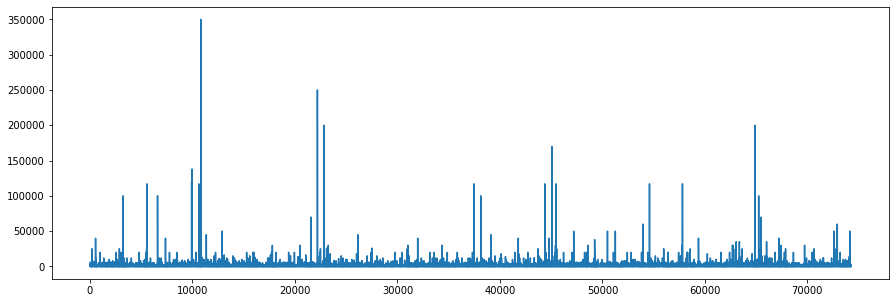

In [20]:
#Plot whole data
data.amount_tsh.plot(figsize=(15,5))

In [21]:
#Top 10 value counts
data.amount_tsh.value_counts()[:10]

0.0       52049
500.0      3874
50.0       3103
1000.0     1858
20.0       1812
200.0      1516
100.0      1034
10.0        995
Name: amount_tsh, dtype: int64

In [22]:
#Describe excluding missing data
data.amount_tsh[data.amount_tsh != 0].describe()

count     22201.000000
mean       1065.826474
std        5240.480449
min           0.200000
25%          50.000000
50%         250.000000
75%        1000.000000
max      350000.000000
Name: amount_tsh, dtype: float64

22

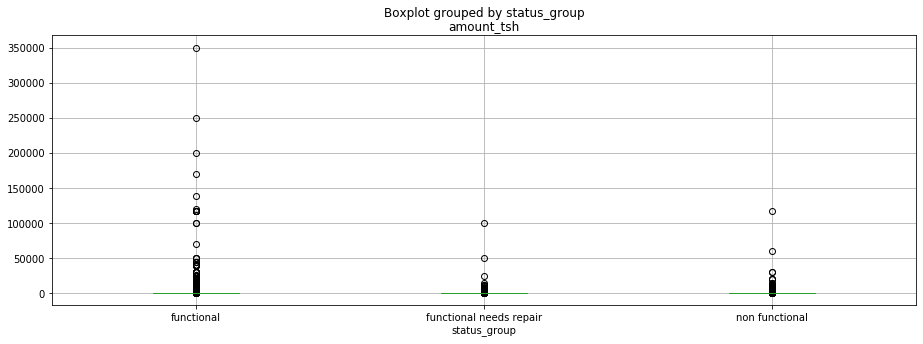

In [23]:
#Boxplot grouped by status_group
data[data.train == True].boxplot("amount_tsh", by="status_group", figsize=(15,5))
len(data.amount_tsh[data.amount_tsh > 50000])

### Dropping simlar columns

In [24]:
#Checking for contnents in paymnet
data["payment"].value_counts()

never pay                31712
pay per bucket           11266
pay monthly              10397
unknown                  10149
pay when scheme fails     4842
pay annually              4570
other                     1314
Name: payment, dtype: int64

In [25]:
#Checking for similar values in Payment_type colum
data["payment_type"].value_counts()

never pay     31712
per bucket    11266
monthly       10397
unknown       10149
on failure     4842
annually       4570
other          1314
Name: payment_type, dtype: int64

In [26]:
#Checking contents of source
data["source"].value_counts()

spring                  21216
shallow well            21140
machine dbh             13822
river                   11964
rainwater harvesting     2863
hand dtw                 1108
lake                      950
dam                       840
other                     261
unknown                    86
Name: source, dtype: int64

In [27]:
#Checking contents of cource
data["source_type"].value_counts()

spring                  21216
shallow well            21140
borehole                14930
river/lake              12914
rainwater harvesting     2863
dam                       840
other                     347
Name: source_type, dtype: int64

In [28]:
#Checking for source_class
data["source_class"].value_counts()

groundwater    57286
surface        16617
unknown          347
Name: source_class, dtype: int64

In [29]:
#extraction_type
data["extraction_type"].value_counts()

gravity                      33263
nira/tanira                  10205
other                         8102
submersible                   5982
swn 80                        4588
mono                          3628
india mark ii                 3029
afridev                       2208
ksb                           1790
other - rope pump              572
other - swn 81                 284
windmill                       152
india mark iii                 135
cemo                           108
other - play pump              101
walimi                          60
climax                          41
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [30]:
data["extraction_type_group"].value_counts()

gravity            33263
nira/tanira        10205
other               8102
submersible         7772
swn 80              4588
mono                3628
india mark ii       3029
afridev             2208
rope pump            572
other handpump       447
wind-powered         152
other motorpump      149
india mark iii       135
Name: extraction_type_group, dtype: int64

In [31]:
data["extraction_type_class"].value_counts()

gravity         33263
handpump        20612
other            8102
submersible      7772
motorpump        3777
rope pump         572
wind-powered      152
Name: extraction_type_class, dtype: int64

In [32]:
#Scheme_management
data["scheme_management"].value_counts()

VWC                 45917
WUG                  6496
unknown              4846
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                 996
SWC                   123
Trust                  92
None                    1
Name: scheme_management, dtype: int64

In [33]:
data["management"].value_counts()

vwc                 50624
wug                  8108
water board          3688
wua                  3118
private operator     2504
parastatal           2229
water authority      1123
other                1083
company               859
unknown               683
other - school        126
trust                 105
Name: management, dtype: int64

In [34]:
data["management_group"].value_counts()

user-group    65538
commercial     4591
parastatal     2229
other          1209
unknown         683
Name: management_group, dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 74249
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 74250 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              74250 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             74250 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

In [37]:
data.drop(columns  = ['management', 'management_group', 'quantity', 'source', 'source_type', 
          'quantity_group', 'water_quality','payment_type', 'extraction_type_group', 
                             'extraction_type_class', 'waterpoint_type_group'], axis = 1, inplace = True)


In [39]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,permit,construction_year,extraction_type,payment,quality_group,source_class,waterpoint_type,train,test,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,False,1999,gravity,pay annually,good,groundwater,communal standpipe,True,NaN,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,True,2010,gravity,never pay,good,surface,communal standpipe,True,NaN,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,True,2009,gravity,pay per bucket,good,surface,communal standpipe multiple,True,NaN,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,True,1986,submersible,never pay,good,groundwater,communal standpipe multiple,True,NaN,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,True,0,gravity,never pay,good,surface,communal standpipe,True,NaN,functional


#### Dropping of columns that arent relevant for modeling

In [40]:
# Drop columns that we werent gonna use
data.drop(columns=["wpt_name", "id", "amount_tsh", "installer", "funder", "scheme_name", "region_code"], axis = 1, inplace=True)

In [41]:
#Display remaining columns
data.columns

Index(['date_recorded', 'gps_height', 'longitude', 'latitude', 'num_private',
       'basin', 'subvillage', 'region', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'permit', 'construction_year', 'extraction_type', 'payment',
       'quality_group', 'source_class', 'waterpoint_type', 'train', 'test',
       'status_group'],
      dtype='object')

#### Test Set

These data seem to be similar and so we delete one column

******Removing of unnecessary columns

Columns: id, date_recorded, recorded_by, wpt_name were determined to be irrelevant to the model
Columns: amount_tsh is 70% 0, num_private is 99% 0
payment_type we determined to be equivalent to payment therefore not necessary and so do away with it.
quantity_group we determined to be nearly equivalent to quantity and necessary as well.
waterpoint_type_group we determined to be eqivalent to waterpoint_type.
scheme_name is 50% nulls.

### Exploratory Data Analysis

#### construction_year

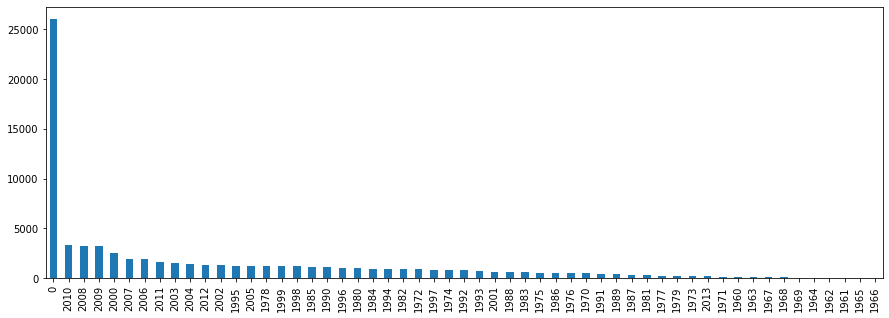

In [42]:
data.construction_year.value_counts().plot.bar(figsize=(15,5));

In [43]:
# finding mean and median without zero values by printing out the summary statistics
data.loc[data['construction_year']!=0].describe()

,gps_height,longitude,latitude,num_private,district_code,population,construction_year
count,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000,48281.000000
mean,1000.202709,35.986840,-6.237147,0.693088,5.967006,271.572233,1996.870943
std,618.538809,2.559941,2.760997,14.240205,10.709279,552.329367,12.440524
min,-63.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,1960.000000
25%,369.000000,34.676387,-8.744394,0.000000,2.000000,30.000000,1988.000000
50%,1153.000000,36.653857,-6.078797,0.000000,3.000000,150.000000,2000.000000
75%,1486.000000,37.814225,-3.654467,0.000000,5.000000,312.000000,2008.000000
max,2777.000000,40.345193,-1.042375,1776.000000,63.000000,30500.000000,2013.000000


In [44]:
#replcaing the zeroes with median of (2000)
data['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)

In [45]:
#bin the data in categories
data['construction_year_bins'] = pd.cut(x=data['construction_year'], bins=[1959, 1970, 1980, 1990, 2000, 2010, 2013])

In [46]:
data[['construction_year','construction_year_bins']]

,construction_year,construction_year_bins
0,1999,"(1990, 2000]"
1,2010,"(2000, 2010]"
2,2009,"(2000, 2010]"
3,1986,"(1980, 1990]"
4,2000,"(1990, 2000]"
...,...,...
74245,1988,"(1980, 1990]"
74246,1994,"(1990, 2000]"
74247,2010,"(2000, 2010]"
74248,2009,"(2000, 2010]"


In [47]:
#dropping the construction_year and recorded_by columns
data.drop(columns=['construction_year','recorded_by'], inplace=True )

In [49]:
data.columns

Index(['date_recorded', 'gps_height', 'longitude', 'latitude', 'num_private',
       'basin', 'subvillage', 'region', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'scheme_management', 'permit',
       'extraction_type', 'payment', 'quality_group', 'source_class',
       'waterpoint_type', 'train', 'test', 'status_group',
       'construction_year_bins'],
      dtype='object')

In [50]:
#Checking of value counts in population
data['population'].value_counts().head(10)

0      26834
1       8782
200     2370
150     2328
250     2087
300     1842
50      1437
100     1419
500     1274
350     1252
Name: population, dtype: int64

In [52]:
# population summary statistics
data.loc[data['population']!=0].describe()

,gps_height,longitude,latitude,num_private,district_code,population
count,47416.000000,47416.000000,47416.000000,47416.000000,47416.000000,47416.000000
mean,967.471254,36.078646,-6.140993,0.723975,6.300405,283.042623
std,612.979582,2.587554,2.736761,14.431650,11.327183,564.413842
min,-90.000000,29.607122,-11.649440,0.000000,1.000000,1.000000
25%,344.000000,34.715217,-8.383484,0.000000,2.000000,40.000000
50%,1133.000000,36.714568,-5.765866,0.000000,3.000000,150.000000
75%,1461.000000,37.949838,-3.600882,0.000000,5.000000,328.000000
max,2777.000000,40.345193,-1.042375,1776.000000,67.000000,30500.000000


In [53]:
#we replace the "0" with mean of 281
data['population'].replace(to_replace = 0 , value =281, inplace=True)

In [54]:
#Checking of value counts in population
data['population'].value_counts().head(10)

281    26839
1       8782
200     2370
150     2328
250     2087
300     1842
50      1437
100     1419
500     1274
350     1252
Name: population, dtype: int64

In [55]:
#cleaning of longitude
data["longitude"].value_counts()

0.000000     2269
37.540805       2
32.967009       2
32.924886       2
37.236326       2
             ... 
37.656457       1
36.820653       1
39.415032       1
33.884180       1
34.658638       1
Name: longitude, Length: 71870, dtype: int64

In [57]:
# summary statistics of the dataframe to check for the mean of the longitude column
data.loc[data['longitude']!=0].describe()

,gps_height,longitude,latitude,num_private,district_code,population
count,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000,71981.000000
mean,686.650616,35.148358,-5.881503,0.476904,5.728248,282.345536
std,693.280413,2.608924,2.808758,11.718023,9.768536,458.089759
min,-90.000000,29.607122,-11.649440,0.000000,0.000000,1.000000
25%,0.000000,33.277747,-8.632576,0.000000,2.000000,90.000000
50%,418.000000,35.007072,-5.173950,0.000000,3.000000,281.000000
75%,1330.000000,37.237383,-3.371872,0.000000,5.000000,281.000000
max,2777.000000,40.345193,-0.998464,1776.000000,80.000000,30500.000000


In [59]:
#Replace the "0"with mean
data['longitude'].replace(to_replace = 0 , value =35.15, inplace=True)

In [60]:
data["longitude"].value_counts()

35.150000    2269
39.096638       2
39.085965       2
33.015597       2
33.005032       2
             ... 
36.820653       1
39.415032       1
33.884180       1
37.640482       1
35.005922       1
Name: longitude, Length: 71870, dtype: int64

In [67]:
#dropping unnecessary columns
data.drop(columns=["date_recorded", "train", "num_private", "test"], axis = 1, inplace=True )

In [68]:
data.columns

Index(['gps_height', 'longitude', 'latitude', 'basin', 'subvillage', 'region',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'scheme_management', 'permit', 'extraction_type', 'payment',
       'quality_group', 'source_class', 'waterpoint_type', 'status_group',
       'construction_year_bins'],
      dtype='object')

#### Saving my final cleaned data for modeling

In [72]:
data.to_csv('data_tz.csv')